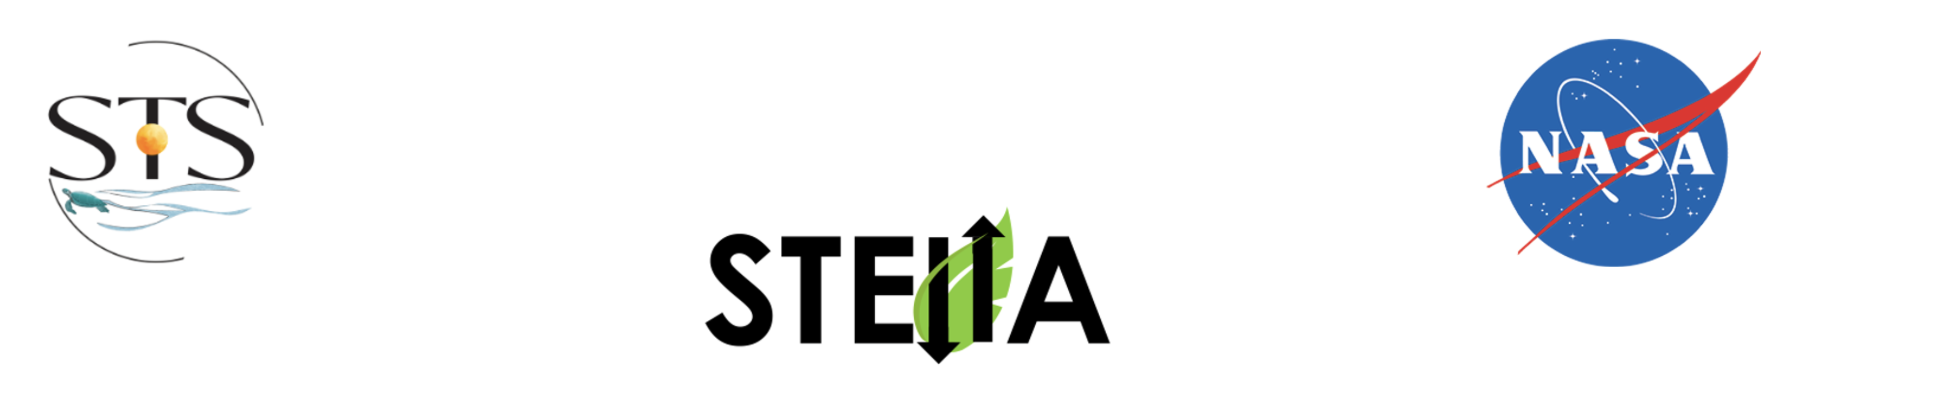


# Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer

The **Science and Technology Society (STS) of Sarasota-Manatee Counties, Florida** is working with the NASA STELLA (Science and Technology Education for Land/Life Assessment) outreach program as a part of our STEM initiative. According to their site, 

- "NASA STELLA instruments are portable low-cost do-it-yourself (DIY) instruments that support science education, and outreach through scientific engagement, inquiry, and discovery while helping you understand Landsat better". 

**STELLA instruments are developed under the influence and inspiration of Landsat.** This alignment not only fulfills our project needs but also serves as a compelling addition to our STEAM initiatives:

1) To train the minds young Floridians to be more aware of our wetlands, to care for them and about them.  Our program will bring more community publicity to the issue of wetlands change, as well.

2) To expose our middle- and high- school aged students to real science, using real data.  That means how to use instrumentation and understand how the data is collected, and how the data can be used in the real world.  It means not only to create beautiful charts and images that form the good results, but also to understand that data must be collected in a proper and reproducible way, that there physics reasons for lack of accuracy and lack of precision that one must understand and minimize in order to achieve meaningful results.


The NASA STELLA-Q2 is capable of making 18 different spectral measurements from the violet/blue portions of the electromagnetic spectrum out to near infrared regions (beyond our range of vision).The following figure **(1)** shows the visible spectrum by wavelength, and the yellow box indicates the STELLA-Q2 frequency range. 

>![image](Spectrum.png)


More can be found on the STELLA DIY instruments at the following link.

>https://landsat.gsfc.nasa.gov/stella/

The following is a sample-by-sample animation of the type of data acquired from STELLA-Q2 Spectrometer built by STS. STS is providing the python code in a Jupyter Notebook that can be used as an example of how to display the data from the STELLA-Q2 device. We have also provided some sample data to be used with this notebook. It should be noted that we did change the name of some of the headers created from our instrument to add colors to each of the wavelength reading that are made in order to display each wavelength as a corresponding color. The near infrared wavelength readings are colored in grays, wheat and gold where the normal visible spectrum colors are in vivid colors that they represent. 

>
>![image](STELLA_color.gif)
>


### Load Python requirments:

In [1]:
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import ipywidgets as widgets
from IPython.display import display

####import panel as pn
#pn.extension('vega')
#pn.extension('tabulator')
#####pn.extension(sizing_mode = 'stretch_width')
#######alt.data_transformers.disable_max_rows()


---
---
# Test 1: Spectral Color Testing

This was a simple test taking readings from the white and 18% gray card photographic standards and then on to red, yellow, green, and blue folder covers, a purple styrofoam brick, a house plant and then two readings from grass; all in the same lighting. 

To take our readings, the STELLA-Q2 starts in the auto mode taking readings everh second. We used the green button on the STELLA-Q2 to interupt this continuous mode and then took individual readings for each sample.  The device will take a seperate reading each time the green button is pushed and each reading has an update in the batch number too. 

The single white reading as Batch 

---
## View data by Sample Colors. 

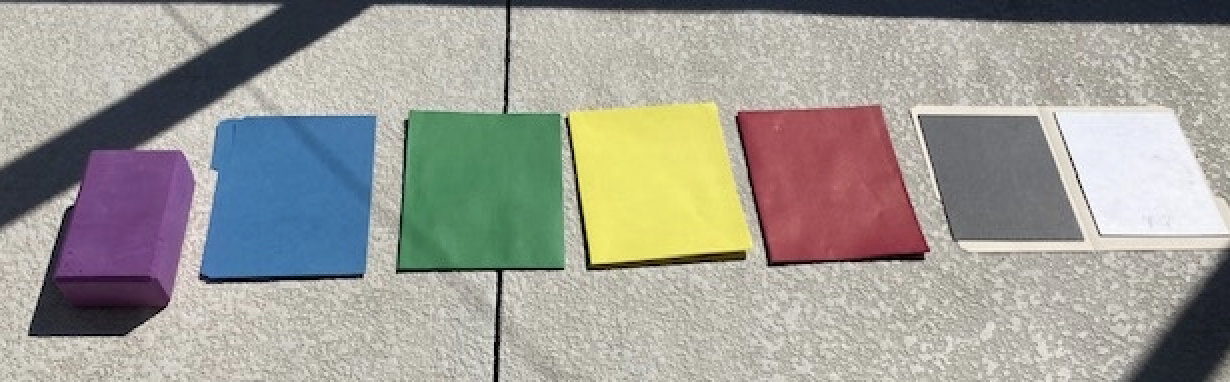

Test	 Batch 
- White	0
- Gray	1
- Red	2
- Yellow	3
- Green	4
- Blue	5
- Purple	6
- Plant	7
- Grass	8
- Grass	9

**data_true_color2.xlsx Excel file created on the STELLA-Q2 micro SD card originaly called data.csv.**
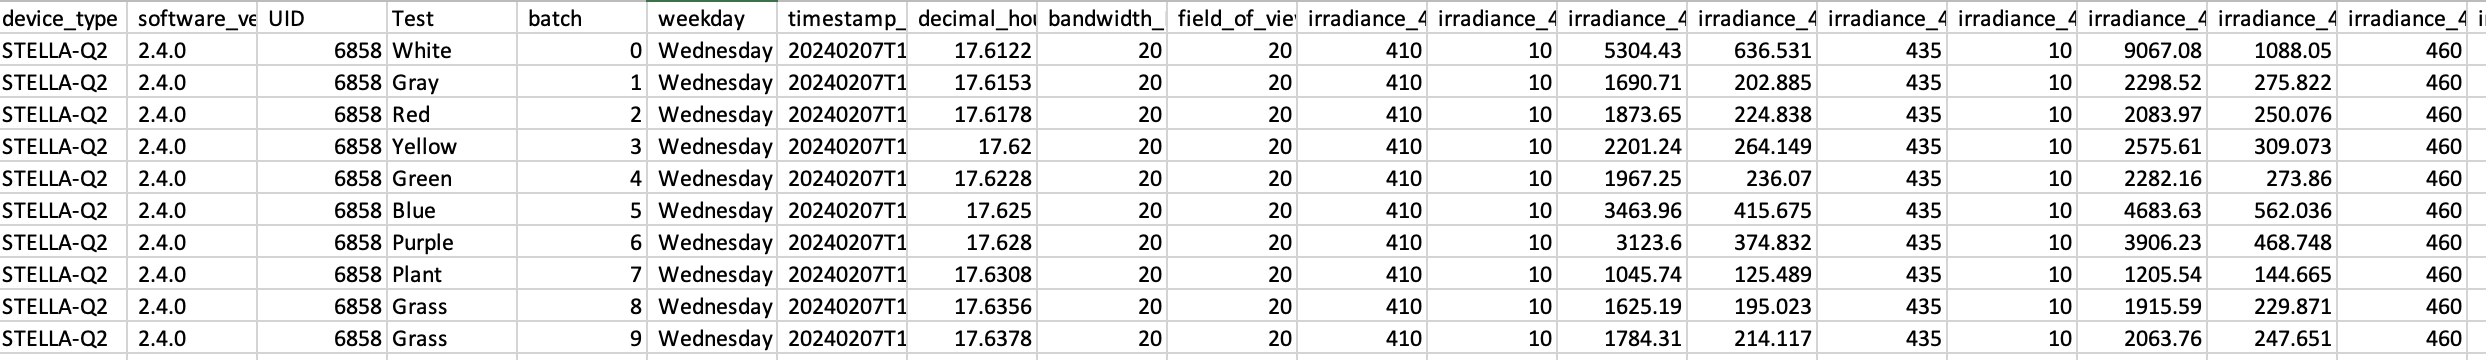

## Read in Excel data file collected on the STELLA-Q2 micro SD card:

In [2]:
#read the file
#file = r'data_test2.xlsx'
#file = r'data_true_colors.xlsx'
file = r'data_true_colors2.xlsx'
#file = r'data_front_yard_grass_brick.xlsx'
#file = r'data_grass_backyard_3PM_shore_at_end.xlsx'
df2 = pd.read_excel(file,index_col=False)
df2.head()

,device_type,software_version,UID,Test,batch,weekday,timestamp_iso8601,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
0,STELLA-Q2,2.4.0,6858,White,0,Wednesday,20240207T173644Z,17.6122,20,20,...,900,10,2486.120,298.334,940,10,1966.760,236.011,4.17,98
1,STELLA-Q2,2.4.0,6858,Gray,1,Wednesday,20240207T173655Z,17.6153,20,20,...,900,10,831.854,99.823,940,10,693.528,83.223,4.16,98
2,STELLA-Q2,2.4.0,6858,Red,2,Wednesday,20240207T173704Z,17.6178,20,20,...,900,10,2088.250,250.590,940,10,1624.410,194.929,4.16,98
3,STELLA-Q2,2.4.0,6858,Yellow,3,Wednesday,20240207T173712Z,17.6200,20,20,...,900,10,2721.730,326.607,940,10,2105.290,252.635,4.17,98
4,STELLA-Q2,2.4.0,6858,Green,4,Wednesday,20240207T173722Z,17.6228,20,20,...,900,10,2379.430,285.531,940,10,1747.050,209.647,4.17,98


## Explore the data:

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 84 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   device_type                                                            10 non-null     object 
 1    software_version                                                      10 non-null     object 
 2    UID                                                                   10 non-null     int64  
 3   Test                                                                   10 non-null     object 
 4    batch                                                                 10 non-null     int64  
 5    weekday                                                               10 non-null     object 
 6    timestamp_iso8601                                                     10 non-null     object

## We did alter the original code.py file on the STELLA-Q2 to use actual color names for the following column data vs. *near IR* as in the original STELLA-Q2 code.py code file.

     49   irradiance_680nm_black_wavelength_nm                                  60 non-null     int64  
     50   irradiance_680nm_black_wavelength_uncertainty_nm                      60 non-null     int64  
     51   irradiance_680nm_black_irradiance_uW_per_cm_squared                   60 non-null     float64
     52   irradiance_680nm_black_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     53   irradiance_705nm_brown_wavelength_nm                                  60 non-null     int64  
     54   irradiance_705nm_brown_wavelength_uncertainty_nm                      60 non-null     int64  
     55   irradiance_705nm_brown_irradiance_uW_per_cm_squared                   60 non-null     float64
     56   irradiance_705nm_brown_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     57   irradiance_730nm_gray_wavelength_nm                                   60 non-null     int64  
     58   irradiance_730nm_gray_wavelength_uncertainty_nm                       60 non-null     int64  
     59   irradiance_730nm_gray_irradiance_uW_per_cm_squared                    60 non-null     float64
     60   irradiance_730nm_gray_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64
     61   irradiance_760nm_silver_wavelength_nm                                 60 non-null     int64  
     62   irradiance_760nm_silver_wavelength_uncertainty_nm                     60 non-null     int64  
     63   irradiance_760nm_silver_irradiance_uW_per_cm_squared                  60 non-null     float64
     64   irradiance_760nm_silver_irradiance_uncertainty_uW_per_cm_squared      60 non-null     float64
     65   irradiance_810nm_lightgray_wavelength_nm                              60 non-null     int64  
     66   irradiance_810nm_lightgray_wavelength_uncertainty_nm                  60 non-null     int64  
     67   irradiance_810nm_lightgray_irradiance_uW_per_cm_squared               60 non-null     float64
     68   irradiance_810nm_lightgray_irradiance_uncertainty_uW_per_cm_squared   60 non-null     float64
     69   irradiance_860nm_linen_wavelength_nm                                  60 non-null     int64  
     70   irradiance_860nm_linen_wavelength_uncertainty_nm                      60 non-null     int64  
     71   irradiance_860nm_linen_irradiance_uW_per_cm_squared                   60 non-null     float64
     72   irradiance_860nm_linen_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     73   irradiance_900nm_wheat_wavelength_nm                                  60 non-null     int64  
     74   irradiance_900nm_wheat_wavelength_uncertainty_nm                      60 non-null     int64  
     75   irradiance_900nm_wheat_irradiance_uW_per_cm_squared                   60 non-null     float64
     76   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     77   irradiance_940nm_gold_wavelength_nm                                   60 non-null     int64  
     78   irradiance_940nm_gold_wavelength_uncertainty_nm                       60 non-null     int64  
     79   irradiance_940nm_gold_irradiance_uW_per_cm_squared                    60 non-null     float64
     80   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64


In [4]:
df2.describe()

,UID,batch,decimal_hour,bandwidth_FWHM_nm,field_of_view_FWHM_DEG,irradiance_410nm_purple_wavelength_nm,irradiance_410nm_purple_wavelength_uncertainty_nm,irradiance_410nm_purple_irradiance_uW_per_cm_squared,irradiance_410nm_purple_irradiance_uncertainty_uW_per_cm_squared,irradiance_435nm_blue_wavelength_nm,...,irradiance_900nm_wheat_wavelength_nm,irradiance_900nm_wheat_wavelength_uncertainty_nm,irradiance_900nm_wheat_irradiance_uW_per_cm_squared,irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared,irradiance_940nm_gold_wavelength_nm,irradiance_940nm_gold_wavelength_uncertainty_nm,irradiance_940nm_gold_irradiance_uW_per_cm_squared,irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared,battery_voltage,battery_percent
count,10.0,10.00000,10.000000,10.0,10.0,10.0,10.0,10.000000,10.000000,10.0,...,10.0,10.0,10.000000,10.000000,10.0,10.0,10.000000,10.000000,10.000000,10.0
mean,6858.0,4.50000,17.624530,20.0,20.0,410.0,10.0,2408.008000,288.960900,435.0,...,900.0,10.0,2235.060400,268.207200,940.0,10.0,1697.554800,203.706700,4.166000,98.0
std,0.0,3.02765,0.008539,0.0,0.0,0.0,0.0,1243.249317,149.189726,0.0,...,0.0,0.0,596.508083,71.580795,0.0,0.0,446.044599,53.525421,0.005164,0.0
min,6858.0,0.00000,17.612200,20.0,20.0,410.0,10.0,1045.740000,125.489000,435.0,...,900.0,10.0,831.854000,99.823000,940.0,10.0,693.528000,83.223000,4.160000,98.0
25%,6858.0,2.25000,17.618350,20.0,20.0,410.0,10.0,1714.110000,205.693000,435.0,...,900.0,10.0,2154.097500,258.491750,940.0,10.0,1655.070000,198.608500,4.160000,98.0
50%,6858.0,4.50000,17.623900,20.0,20.0,410.0,10.0,1920.450000,230.454000,435.0,...,900.0,10.0,2429.995000,291.599000,940.0,10.0,1831.320000,219.758500,4.170000,98.0
75%,6858.0,6.75000,17.630100,20.0,20.0,410.0,10.0,2893.010000,347.161250,435.0,...,900.0,10.0,2561.547500,307.385750,940.0,10.0,1970.067500,236.408500,4.170000,98.0
max,6858.0,9.00000,17.637800,20.0,20.0,410.0,10.0,5304.430000,636.531000,435.0,...,900.0,10.0,2800.630000,336.076000,940.0,10.0,2105.290000,252.635000,4.170000,98.0


## **Necessary step to strip out blank spaces in header column names:**

In [5]:
# Remove leading/trailing whitespaces in column names
df2.columns = df2.columns.str.strip()

## Plot Battery Voltage:

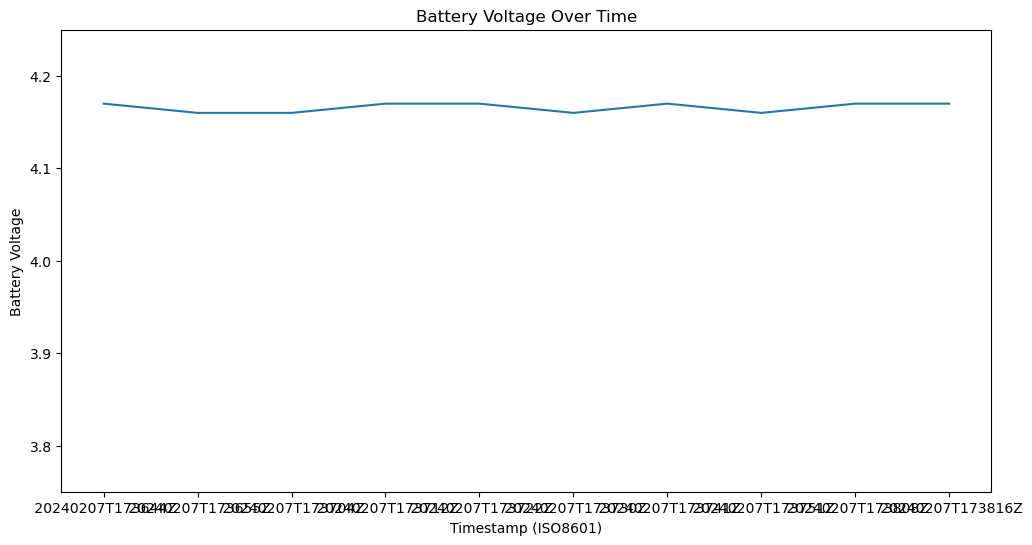

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df2['timestamp_iso8601'], df2['battery_voltage'])
plt.ylim(3.75,4.25)
plt.xlabel('Timestamp (ISO8601)')
plt.ylabel('Battery Voltage')
plt.title('Battery Voltage Over Time')
plt.show()


## Time-Series Plot of raw data from each channel:

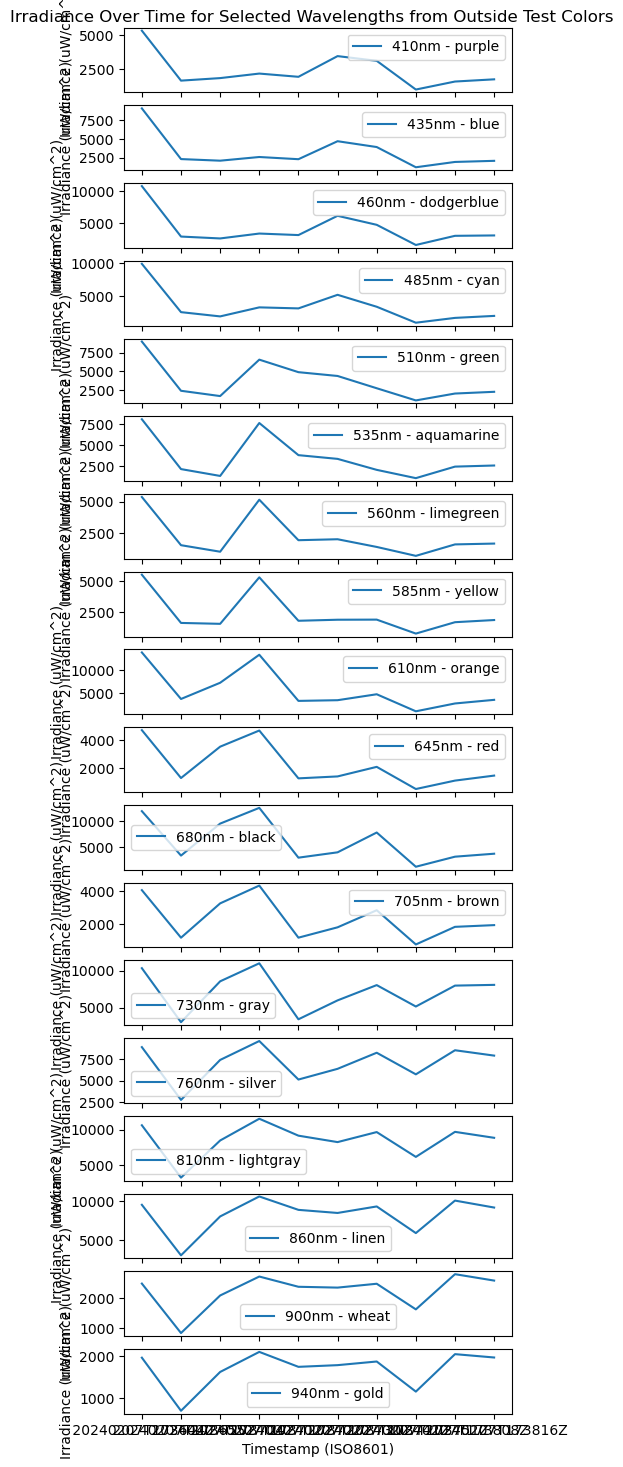

In [7]:
# List of wavelengths for plotting
#wavelengths_to_plot = [410, 435, 450, 485, 510, 535, 560, 585, 610, 645, 680]
wavelengths_to_plot= [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]

# Create subplots
fig, axs = plt.subplots(len(wavelengths_to_plot), 1, figsize=(5, 1 * len(wavelengths_to_plot)), sharex=True)

# Loop through each wavelength and plot the data
for i, wavelength in enumerate(wavelengths_to_plot):
    # Use regex to match column names containing the wavelength
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in df2.columns if re.search(wavelength_pattern, col)]
    
    # Plot the data for each matched column
    for column in wavelength_columns:
        color = re.search(wavelength_pattern, column).group(1)
        axs[i].plot(df2['timestamp_iso8601'], df2[column], label=f'{wavelength}nm - {color}')

    axs[i].set_ylabel('Irradiance (uW/cm^2)')
    axs[i].legend()

# Set common xlabel and title
plt.xlabel('Timestamp (ISO8601)')
plt.suptitle('Irradiance Over Time for Selected Wavelengths from Outside Test Colors', y=0.89)

# Show the plot
plt.show()


## Plot of raw spectral readings by wavelength:

Your can use the Pannern# bar to move from sample to sample:

In [8]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df2.columns))))

#Test = df2['Test']

#def update_plot(timestamp_index, batch_index):
def update_plot(timestamp_index):
    
    #print(timestamp_index)
    
    plt.figure(figsize=(12, 6))

    #timestamp = df['timestamp_iso8601'][timestamp_index]
    timestamp = timestamp_index
    test = df2['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df2.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Map custom colors to standard recognized color names
            # color = map_color(color)

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df2.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df2.columns:
                wavelength_data = df2[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df2[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df2[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df2[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                             linestyle='', marker='o', markersize=5, capsize=5, color=color)
  
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.xlim(350,1000)
    plt.ylim(0,14000)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f"Irradiance Over Wavelength by Timestamp {timestamp} and Batch {batch_index}: \n Test Pattern {df2['Test']}")
    #plt.title(f"Irradiance Over Wavelength by Test Pattern {timestamp}: \n \n Test Pattern {df2['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df2['Test']}")

    
    
#timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df2) - 1, step=1, description='Timestamp Index')
timestamp_slider = widgets.IntSlider(value=0 , min=0, max=len(df2)-1 , step=1, description='Pattern#', continuous_update=True, orientation='horizontal')#,
    #readout=True)#,
    #readout_format='d')

batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Pattern#', max=9), Output()), _dom_classes=('widget-inte…

## Line-Plot of raw Spectral Data:

In [9]:
def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = timestamp_index
    test = df2['Test'][timestamp_index]

    wavelength_data_list = []
    irradiance_data_list = []
    
    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df2.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Check if the column exists before using it
            if column in df2.columns:
                # Extract wavelength data
                wavelength_data_str = wavelength
                try:
                    wavelength_data = int(wavelength_data_str)  # Convert string to integer
                except ValueError:
                    try:
                        wavelength_data = float(wavelength_data_str)  # Convert string to float
                    except ValueError:
                        continue  # Skip if wavelength cannot be converted to int or float

                # Append data to lists
                wavelength_data_list.append(wavelength_data)
                irradiance_data_list.append(df2[column][timestamp_index])
                
    # Plot data points
    plt.plot(wavelength_data_list, irradiance_data_list, linestyle='-', marker = 'o',markersize = 10, markeredgecolor = 'black', mfc = 'k', linewidth = 4,color='red')

   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')
            
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    plt.ylim(0,14000)    
    plt.grid()
    #plt.title(f"Irradiance Over Wavelength by Test Pattern {timestamp}: \n \n Test Pattern {df2['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df2['Test']}")

# Create a slider widget
timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df2) - 1, step=1, description='Timestamp Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=9), Output()), _dom_classes=('widg…

## Composite of all Readings from Test 1: Spectral Color Testing

Timestamp not implemented on this plot.

In [10]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df2.columns))))

# Function to update the plot based on selected timestamp
def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df2['timestamp_iso8601'][timestamp_index]
    test = df2['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df2.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = re.search(wavelength_pattern, column).group(1)

            wavelength_data = df2[f'irradiance_{wavelength}nm_{color}_wavelength_nm']
            irradiance_data = df2[column]
            wavelength_uncertainty = df2[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm']
            irradiance_uncertainty = df2[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared']

            plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,color=color,
                         label=f'{wavelength}nm - {color}', linestyle='', marker='o', markersize=3, capsize=3)

   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')
           
            
            
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    plt.ylim(0,14000)    
 
    plt.grid()
    #plt.title(f'Irradiance Over Wavelength - {timestamp}')
    #plt.title(f"Irradiance Over Wavelength for all Test Patterns {timestamp_index}: \n \n Test Pattern {df2['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df2['Test']} for Backyard")


# Create a slider widget
timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df2) - 1, step=1, description='Timestamp Index',disabled=True,)

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', disabled=True, max=9), Output()), _dom…

---
---
---
# **Now we will apply Normalization to our 3:00PM grass data per recommendations from Paul Mirel.**

## Load White Standard data taken in same lighting conditions:

### Email from Paul Mirel of NASA, February 5, 2024: 
    It’s general practice to measure a white reference in the same illumination as the sample, and then to measure the sample. The unitless reflectance from the sample is then the sample signal divided by the white reference signal, in each wavelength. Landsat uses a stretch of desert sand, or a huge white tarp!, as a reference. Spectralon is the material of choice for white references, but it’s expensive. We get quite good results with ordinary white Styrofoam (without cover sheets), and are considering using white playground sand, or a plain white felt acrylic blanket. The goal is a material that scatters light equally in all directions, and does not have much, or any, specular shiny reflectance.


## Extract white reading (first reading) and then calibrate all readings to this white card reading:

In [11]:
# Extract the white standard readings from the DataFrame

# Initialize white_standard_readings as an empty dictionary
white_standard_readings = {}


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df2.columns))))

timestamp = df2['timestamp_iso8601'][0]

for wavelength in wavelengths:
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in df2.columns if re.search(wavelength_pattern, col)]

    for column in wavelength_columns:
        color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
        if wavelength == '410':
            color = 'purple'
        elif wavelength == '435':
            color = 'blue'
        elif wavelength == '460':
            color = 'dodgerblue'
        elif wavelength == '485':
            color = 'cyan'
        elif wavelength == '510':
            color = 'green'
        elif wavelength == '535':
            color = 'aqumarine'
        elif wavelength == '560':
            color = 'limegreen'
        elif wavelength == '585':
            color = 'yellow'
        elif wavelength == '610':
            color = 'orange'
        elif wavelength == '645':
            color = 'red'
        elif wavelength == '680':
            color = 'black'
        elif wavelength == '705':
            color = 'brown'
        elif wavelength == '730':
            color = 'gray'
        elif wavelength == '760':
            color = 'silver'
        elif wavelength == '810':
            color = 'lightgray'
        elif wavelength == '860':
            color = 'linen'
        elif wavelength == '900':
            color = 'wheat'
        elif wavelength == '940':
            color = 'gold'

        # Map custom colors to standard recognized color names
        # color = map_color(color)

        # Check if the column exists before using it
        if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df2.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df2.columns:
            #wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][0]
            #irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_reading = df2[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_standard_readings[wavelength] = white_reading
            
    print()
    print('1) This is the raw white card readings from our white card calibration:',white_reading, 'at', wavelength,'nm.')
  
    print()
    print('2) These are our white card standard wavelengths and readings from our spectrometer:',white_standard_readings,'used with wavelength', wavelength,'nm.')



# Calculate scaling factors using only white standard readings
scaling_factors = {}
for wavelength, white_reading in white_standard_readings.items():
    # Assuming the minimum possible reading is zero
    scaling_factor = 1.0 / white_reading
    scaling_factors[wavelength] = scaling_factor

    
    
print()
print('3) These are our wavelengths and white scaling factors:',scaling_factors)

# Print scaling factors
print()
print("Scaling Factors:")
for wavelength, factor in scaling_factors.items():
    print(f"4) These are our final wavelength and scaling factors per wavelength {wavelength}nm: {factor}")

    
#print([scaling_factors[factor] for wavelength in wavelengths])    


1) This is the raw white card readings from our white card calibration: 5304.43 at 410 nm.

2) These are our white card standard wavelengths and readings from our spectrometer: {'410': 5304.43} used with wavelength 410 nm.

1) This is the raw white card readings from our white card calibration: 9067.08 at 435 nm.

2) These are our white card standard wavelengths and readings from our spectrometer: {'410': 5304.43, '435': 9067.08} used with wavelength 435 nm.

1) This is the raw white card readings from our white card calibration: 10745.7 at 460 nm.

2) These are our white card standard wavelengths and readings from our spectrometer: {'410': 5304.43, '435': 9067.08, '460': 10745.7} used with wavelength 460 nm.

1) This is the raw white card readings from our white card calibration: 9859.94 at 485 nm.

2) These are our white card standard wavelengths and readings from our spectrometer: {'410': 5304.43, '435': 9067.08, '460': 10745.7, '485': 9859.94} used with wavelength 485 nm.

1) This

## Calibrated Spectrum:

In [12]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df2.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df2['timestamp_iso8601'][timestamp_index]
    test = df2['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df2.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df2.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df2.columns:
                wavelength_data = df2[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df2[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df2[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df2[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                #print(scaling_factor)
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')




    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    plt.ylim(0,1.0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'Corrected Irradiance Over Wavelength by Timestamp {timestamp} and Batch {batch_index} for Backyard')
    plt.title(f"White Card Corrected Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df2['Test']} for Backyard")




                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df2) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=9), Output()), _dom_classes=('widg…

## Qc Results and White Card normalization:

In [13]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df2.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df2['timestamp_iso8601'][timestamp_index]
    test = df2['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df2.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aqumarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df2.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df2.columns:
                wavelength_data = df2[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df2[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df2[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df2[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                print('Actual Scaling Factor:', scaling_factor, 'or Scaling Factor(', scaling_factor, ') x Reading (',irradiance_data, ')=',round(scaling_factor*irradiance_data,2), 'as a unitless calibrated reading')
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(350, 400, alpha=0.5, color='plum',label='Near UV from 300-400nm')
    plt.axvspan(400, 430, alpha=0.5, color='violet',label='Violet from 400-430nm ')
    plt.axvspan(430, 490, alpha=0.2, color='blue',label='Blue from 430-490nm')
    plt.axvspan(490, 530, alpha=0.2, color='green',label='Green from 490-530nm')
    plt.axvspan(530, 580, alpha=0.2, color='yellow',label='Yellow from 530-580nm')
    plt.axvspan(580, 630, alpha=0.2, color='orange',label='Orange from 580-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')




    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    plt.title(f"Qc (look at printout of scaling factors) of White Card Corrected Irradiance Over Wavelength by Grass Reading '{test}' from Backyard")
    #plt.title(f"Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {grass['Test']}")




                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df2) - 1, step=1, description='Timestamp Index')
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', max=9), Output()), _dom_classes=('widg…